<a href="https://colab.research.google.com/github/JoshStrother/DataVisualization/blob/main/Exam_3_Joshua_Strother_CPSMA_4313.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gathering possible libraries and data ↓

In [2]:
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns

##1.A

Storing data frame here ↓

In [3]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/worldCupPlayer.csv')
df.head()

,Unnamed: 0,Rank,player,club,age,Apps,Mins,Goals,Assists,Yel,Red,SpG,PS,AerialsWon,MotM,Rating,nationality
0,0,1,Hakim Ziyech,Ajax,25,34,3043,9,15,4,0,4.9,75.4,0.2,9,8.21,Morocco
1,2,2,Alireza Jahanbakhsh,AZ Alkmaar,24,33,2840,21,12,3,0,4.3,73.4,0.7,14,8.20,Iran
2,4,3,Hirving Lozano,PSV Eindhoven,22,29,2350,17,8,4,2,3.4,75.3,0.6,8,7.90,Mexico
3,6,11,Lasse Schone,Ajax,32,27(3),2350,10,3,6,0,1.9,87.0,1.9,2,7.45,Denmark
4,10,25,Santiago Arias,PSV Eindhoven,26,30,2664,3,6,5,0,1.5,82.3,1,2,7.25,Colombia


I don't have a favorite 'club' or 'nationality' so we will just use PSV Eindhoven from Mexico.

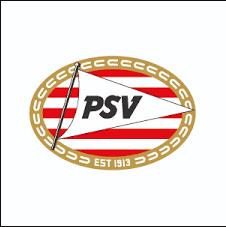

https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcSr42gleXJDGewQhErFAq0RgYdEK51C_fAXNm4GOmGch7Ezq_AW

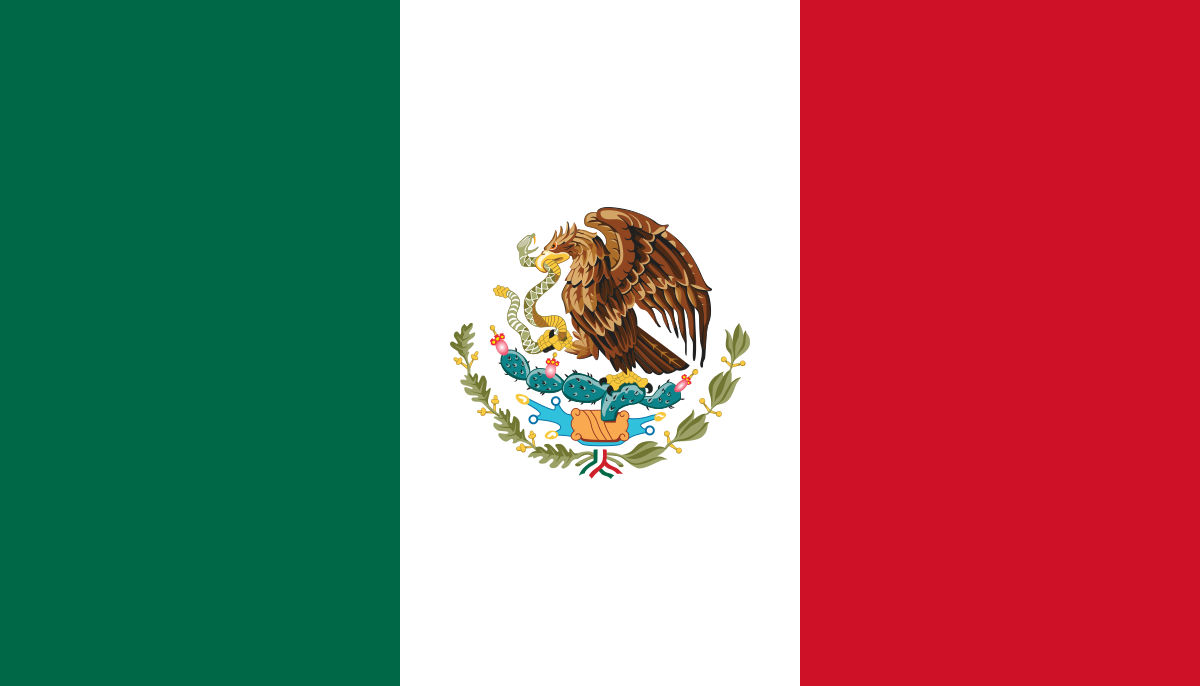

https://en.wikipedia.org/wiki/Mexico#/media/File:Flag_of_Mexico.svg


##1.B

No favorite so I will use Mexico.

In [4]:
}df1 = (df[df['nationality'] == "Mexico"])
df1

,Unnamed: 0,Rank,player,club,age,Apps,Mins,Goals,Assists,Yel,Red,SpG,PS,AerialsWon,MotM,Rating,nationality
2,4,3,Hirving Lozano,PSV Eindhoven,22,29,2350,17,8,4,2,3.4,75.3,0.6,8,7.90,Mexico
231,446,83,Andres Guardado,Real Betis,31,25(4),2267,2,8,7,0,1.1,86.5,0.6,2,6.91,Mexico
324,626,184,Carlos Salcedo,Eintracht Frankfurt,24,17(3),1608,0,0,5,0,0.3,80.3,2.4,0,6.68,Mexico
396,765,2,Carlos Vela,Los Angeles FC,29,12,1080,7,2,1,0,3.9,83.4,0.3,4,7.82,Mexico
398,768,137,Jonathan dos Santos,LA Galaxy,28,7(1),622,1,0,2,0,0.6,88.0,0.1,0,6.88,Mexico
518,996,8,Hector Herrera,FC Porto,28,26(3),2335,3,4,7,0,1.3,84.7,2.2,1,7.50,Mexico
519,997,90,Hector Herrera,FC Porto,28,6,531,1,1,1,0,1.2,82.9,1.8,0,7.09,Mexico
524,1007,177,Raul Jimenez,Benfica,27,6(27),970,6,6,3,0,1.5,68.7,1.5,1,6.59,Mexico
525,1009,357,Raul Jimenez,Benfica,27,3(2),308,0,0,0,0,1.8,67.3,2.8,0,6.44,Mexico
579,1112,367,Diego Reyes,FC Porto,25,2(4),234,0,0,0,0,-,89.1,1,0,6.41,Mexico


Though there are 602 rows, the Rank *appears* to be in descending order.  This obviously is not true because the last row is ranked 269. If it is true, then there are 333 copies of data or data with no rank.  Could always be tested with a simple agg(max)  

In [5]:
df.Rank.agg(max)

743

##1.C

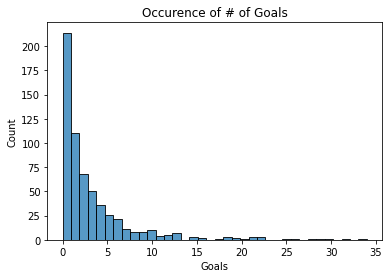

In [6]:
ax = sns.histplot(data=df, x="Goals")
ax.set(Title = "Occurence of # of Goals")

plt.show()

Based on the data, it looks like anything over 15 really is hard to achieve, but there are some steady players around 20.  Most players score 0 points and that makes sense because not every position is about scoring.

##1.D

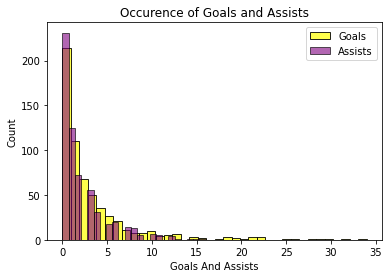

In [7]:
ax = sns.histplot(data=df, x="Goals", color='yellow', label="Goals", alpha=.7)
sns.histplot(data=df, x="Assists", color='purple', label="Assists", alpha=.6)
ax.set(Title = "Occurence of Goals and Assists",
       xlabel="Goals And Assists")
plt.legend()
plt.show()

There seems to be some sort of correlation between the two, we could always do a scatter plot and see if there is.  More people get no assists or goals than anything else.

##1.E

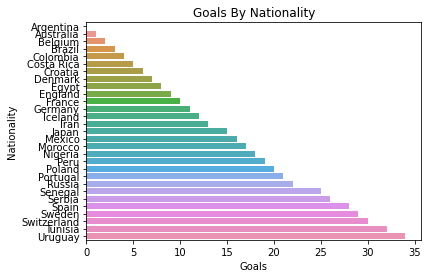

In [8]:
ax = sns.barplot( y= df.groupby('nationality').nationality.agg('count').index,
                 x= df.groupby('Goals').Goals.agg('max'))
ax.set_title('Goals By Nationality')
ax.set_ylabel("Nationality")
plt.show()

Looks like Argentina had no goals, all players from there must not play positions meant for scoring.  I attempted to create more space between the names but it did not like anything I had tried.

##1.F

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


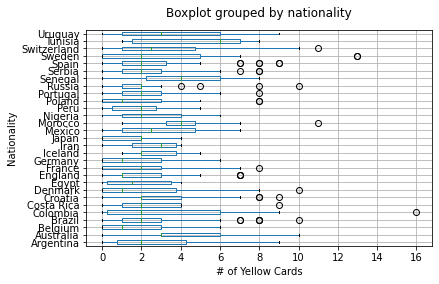

In [9]:
ax = df.boxplot(column = ('Yel'), by = 'nationality', vert=False)

ax.set_title("")
ax.set_ylabel("Nationality")
ax.set_xlabel("# of Yellow Cards")

plt.show()

Switzerland and Australia both have a higher max of yellow cards, yet Australia had one of the lowest goals and Switzerland had one of the highest.

##1.G

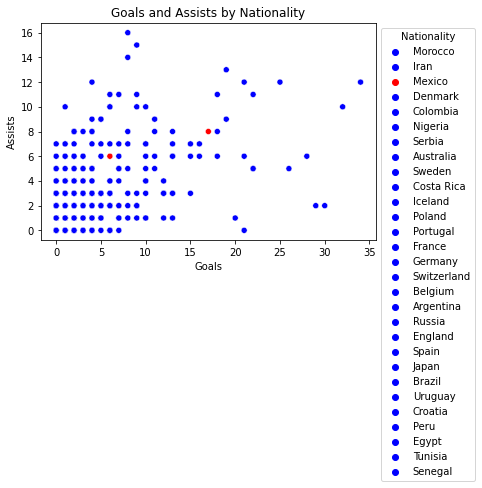

In [10]:
ax = sns.scatterplot(data=df, x='Goals', y='Assists', hue='nationality',
                    palette=['blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'], legend='full')
ax.set_title("Goals and Assists by Nationality")

plt.legend(title = "Nationality")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


##1.H

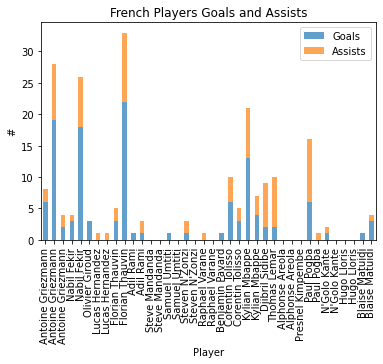

In [52]:
df1 = df[['nationality', 'player', 'Goals', 'Assists']]
df1 = (df1[df1['nationality'] == "France"])
ax =df1.plot(kind = 'bar', x='player', stacked = True, alpha=.7)

ax.set(title="French Players Goals and Assists",
             xlabel="Player",
      ylabel="#")

plt.show()

I think this is the closest to what is best to display.  I attempted to group the players together and combine their duplicates from other types of play (League and UEFA) but it made a lot of plots rather than one.  It is appropriate to display both goals and assists becaues both deal with scoring on the goal.  

##1.I

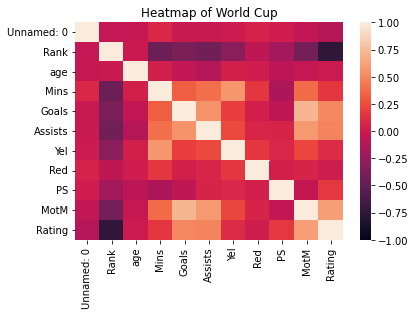

In [56]:
ax = sns.heatmap(df.corr(),vmin = -1)
ax.set(title = 'Heatmap of World Cup')

plt.show()

Its interesting that rating and rank have no correlation at all.  

##2.A

About 4 hours in total 

##2.B

I think i spent the most amount of time on the box plot and the least amount of time on the heat map.

##2.C

I am still unsure of what exactly the stacked bars mean..idk if that is total or if there are more or what exactly it is trying to show.

##Resources
https://github.com/JoshStrother/DataVisualization Imports

https://seaborn.pydata.org/generated/seaborn.histplot.html Histogram

https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn Histogram

https://github.com/nurfnick/Data_Viz/blob/main/27_Proportions.ipynb Bar chart

https://github.com/nurfnick/Data_Viz/blob/main/26_Many_Distributions.ipynb Box plot

Scatter Plot 3 links{
  https://github.com/nurfnick/Data_Viz/blob/main/28_Associations.ipynb
  https://colab.research.google.com/drive/1J4fB9b03BDN91ayZARXal82IXUl2jmEu#scrollTo=6kSQ6IqjItOP
  https://cmdlinetips.com/2019/04/how-to-specify-colors-to-scatter-plots-in-python/
}

https://github.com/nurfnick/Data_Viz/blob/main/30_Visualize_Conclusion.ipynb heatmap

“I attest that the resources above were the only ones utilized in completing
the exam and the work included is my own and no one else from the course.”
-Joshua Strother